In [48]:
import pandas as pd
import glob
import json 
import numpy as np

### Get the data 
from the Logic App workflow, we get several json file, hence need to concatenate all together

In [8]:
# concatenate the json files

df = pd.read_json('./Data/WithCoordinates_Finnyeardata_WholeNorway/WithCoordinates_1987_Finnyeardata_WholeNorway_1987_label_7.json')

In [9]:
df.head()

,Location,ad_id,ad_link,ad_type,energy_label,from_year,lat,local_area_name,lon,number_of_bedrooms,owner_type_description,property_type_description,size_from,to_year,type
0,"Vanylvsvegen 1144, Fiskå",261340328,https://www.finn.no/realestate/homes/ad.html?f...,1,7,1987,62.09800,FISKÅ,5.59500,4,Eier (Selveier),Enebolig,178,1987,realestate
1,"Marcus Thranes gate 5, Gjøvik",261324095,https://www.finn.no/realestate/homes/ad.html?f...,1,7,1987,60.79909,None,10.68576,2,Eier (Selveier),Leilighet,88,1987,realestate
2,"Herregårdsveien 115B, Oslo",258617331,https://www.finn.no/realestate/homes/ad.html?f...,1,7,1987,59.84323,Ljan / Nordstrand,10.77654,1,Andel,Leilighet,51,1987,realestate
3,"Furulundtoppen 21, Oslo",257295350,https://www.finn.no/realestate/homes/ad.html?f...,1,7,1987,59.92410,Ullern/Furulundtoppen,10.64710,2,Eier (Selveier),Leilighet,136,1987,realestate
4,"Abraham Berges vei 46A, Vanse",260514516,https://www.finn.no/realestate/homes/ad.html?f...,1,7,1987,58.10040,None,6.69778,2,Eier (Selveier),Leilighet,93,1987,realestate


In [18]:
data = []

for f in glob.glob("./Data/WithCoordinates_Finnyeardata_WholeNorway/*.json"):

    with open(f,) as infile:

        data.extend(json.load(infile))


with open("merged_file.json",'w') as outfile:

    json.dump(data, outfile)



In [21]:
len(data)

6961

### Data Cleaning

In [25]:
df = pd.DataFrame(data)

In [27]:
df.head()

,Location,ad_id,ad_link,ad_type,energy_label,from_year,lat,local_area_name,lon,number_of_bedrooms,owner_type_description,property_type_description,size_from,to_year,type
0,"Olsvikåsen 132, Olsvik",261320756,https://www.finn.no/realestate/homes/ad.html?f...,1,5,1979,60.38086,Bergen Vest/Olsvik,5.22157,1,Andel,Leilighet,47.0,1979,realestate
1,"Hans Haslums Vei 33, Bekkestua",261047389,https://www.finn.no/realestate/homes/ad.html?f...,1,5,1979,59.91960,DESIGNBOLIG PÅ BEKKESTUA,10.57280,6,Eier (Selveier),Enebolig,359.0,1979,realestate
2,"Oskarbakken 21, Mo i Rana",260995104,https://www.finn.no/realestate/homes/ad.html?f...,1,5,1979,66.29020,Åga,14.09350,5,Eier (Selveier),Enebolig,153.0,1979,realestate
3,"Sandalssvingen 7, Stavanger",260891920,https://www.finn.no/realestate/homes/ad.html?f...,1,5,1979,58.95740,SANDAL,5.68380,1,Andel,Leilighet,47.0,1979,realestate
4,"Midtåstunet 8, Førde",260886553,https://www.finn.no/realestate/homes/ad.html?f...,1,5,1979,61.45764,None,5.90090,3,Andel,Rekkehus,99.0,1979,realestate


In [28]:
df['property_type_description'].value_counts()

Leilighet                3301
Enebolig                 2711
Tomannsbolig              460
Rekkehus                  385
Gårdsbruk/Småbruk          66
Andre                      19
Bygård/Flermannsbolig      10
Produksjon/Industri         4
Annet fritid                3
Garasje/Parkering           2
Name: property_type_description, dtype: int64

In [30]:
df['owner_type_description'].value_counts()

Eier (Selveier)    5455
Andel              1446
Aksje                59
Obligasjon            1
Name: owner_type_description, dtype: int64

#### energy labels 
dict ={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

<AxesSubplot:>

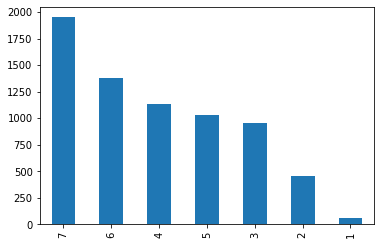

In [45]:
df['energy_label'].value_counts().plot.bar()

####  transform the year as category

# year as labels
<1901 = 0 

1901-1905=1

1906-2011=2

...

In [49]:
#Year of construction from continuous to categorical

df['byggear_cat']=pd.cut(df['from_year'],range(1901, 2027, 5),labels=range(1,26,1),right=False)
df['byggear_cat'].values.add_categories(0)
df['byggear_cat']= np.where(df['byggear_cat'].isnull(),0,df['byggear_cat'])

<AxesSubplot:>

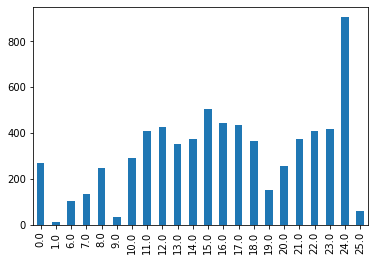

In [54]:
df['byggear_cat'].value_counts().sort_index().plot.bar()

In [73]:
    pd.pivot_table(df,values=['energy_label'], index='byggear_cat',aggfunc='value_counts')

ValueError: Grouper for 'energy_label' not 1-dimensional